In [6]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import json
from plotly.subplots import make_subplots

In [7]:
def extract_ids_and_types(dataset_name):
    """
    Extracts entity IDs and their types from test.txt files in a dataset's split folders.

    Parameters:
    -----------
    dataset_name : str
        The name of the dataset ("dbpedia", "lmdb", or "faces").

    Returns:
    --------
    dict
        A dictionary mapping entity IDs to their types.
    """
    
    # Define the base directory 

    # Set this to the parent directory ESLM Experiment
    ### UPDATE
    working_directory = "C:/Users/simon/Documents/Uni/UniMaterial/Master/Seminar Knowledge Graphs and LLM"

    if dataset_name == "dbpedia":
        base_directory = os.path.join(working_directory, "ESLM-Experiment/datasets/ESBM_benchmark_v1.2")
    elif dataset_name == "lmdb":    
        base_directory = os.path.join(working_directory, "ESLM-Experiment/datasets/ESBM_benchmark_v1.2")
    elif dataset_name == "faces":
        base_directory = os.path.join(working_directory, "ESLM-Experiment/datasets/FACES")   

    # Construct the dataset directory path
    dataset_dir = os.path.join(base_directory, f"{dataset_name}_split")
    
    # Initialize a dictionary to store the results
    global_data = {}
    
    # Iterate through Fold0 to Fold4
    for i in range(5):
        folder_name = f"Fold{i}"
        folder_path = os.path.join(dataset_dir, folder_name)
        file_path = os.path.join(folder_path, "test.txt")
        
        # Check if the file exists
        if os.path.exists(file_path):
            # Read the file
            df = pd.read_csv(file_path, sep='\t', header=None, names=['ID', 'Type', 'URI'])
            
            # Add IDs and Types to the global data dictionary
            for idx, row in df.iterrows():
                global_data[row["ID"]] = row["Type"]
        else:
            print(f"File not found: {file_path}")
    
    return global_data

In [8]:
def extract_node_degree(data_dict, dataset_name):
    """
    Computes the node degree for each entity based on the number of triples in its description file.

    Parameters:
    -----------
    data_dict : dict
        A dictionary mapping entity IDs to their types.
    dataset_name : str
        The name of the dataset ("dbpedia", "lmdb", or "faces").

    Returns:
    --------
    pd.DataFrame
        A DataFrame containing entity IDs, their types, and their node degrees.
    """
    
    # Set this to the parent directory ESLM Experiment
    ### UPDATE
    working_directory = "C:/Users/simon/Documents/Uni/UniMaterial/Master/Seminar Knowledge Graphs and LLM"

    if dataset_name == "dbpedia":
        base_directory = os.path.join(working_directory, "ESLM-Experiment/datasets/ESBM_benchmark_v1.2")
    elif dataset_name == "lmdb":    
        base_directory = os.path.join(working_directory, "ESLM-Experiment/datasets/ESBM_benchmark_v1.2")
    elif dataset_name == "faces":
        base_directory = os.path.join(working_directory, "ESLM-Experiment/datasets/FACES") 


    base_path = os.path.join(base_directory, f"{dataset_name}_data")


    # Prepare results list
    results = []

    for key, value in data_dict.items():
        # Create a folder for each key
        folder_path = os.path.join(base_path, str(key))
        os.makedirs(folder_path, exist_ok=True)

        # File path for the {ID/key}_desc.nt file
        file_path = os.path.join(folder_path, f"{key}_desc.nt")

        # Count the number of triples in the file
        with open(file_path, 'r', encoding='utf-8') as f:
            num_triples = sum(1 for line in f if line.strip())

        # Append the result to the results list
        results.append({"ID": key, "Class": value, "Node Degree": num_triples})

    # Create a DataFrame from the results
    df = pd.DataFrame(results)

    return df

In [9]:
def plot_type_distribution(type_dict, title):
    """
    Plots a histogram of class distribution based on the provided type dictionary.

    Parameters:
    -----------
    type_dict : dict
        A dictionary mapping entity IDs to their types.
    title : str
        The title of the plot.

    Returns:
    --------
    None
        Displays the plot.
    """
    
    # Count the frequency of each type
    type_counts = Counter(type_dict.values())
    
    # Create the histogram
    plt.figure(figsize=(8, 6))
    plt.bar(type_counts.keys(), type_counts.values(), color=(0/255, 150/255, 130/255))
    
    # Add labels and title
    plt.xlabel('Class', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(title, fontsize=14)
    
    # Rotate and align x-axis labels
    plt.xticks(rotation=60, ha='right', fontsize=10)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [10]:
def plot_type_distribution_worst_entities(df_worst_entities, dict_dataset, title):
    """
    Plots the class distribution of the worst-performing entities.

    Parameters:
    -----------
    df_worst_entities : pd.DataFrame
        A DataFrame containing entity IDs of the worst-performing entities.
    dict_dataset : dict
        A dictionary mapping entity IDs to their types.
    title : str
        The title of the plot.

    Returns:
    --------
    None
        Displays the plot.
    """
    
    # Map IDs to classes using the dictionary
    df_worst_entities["class"] = df_worst_entities["ID"].map(dict_dataset)
    
    # Plot class distribution
    class_counts = df_worst_entities["class"].value_counts()
    plt.figure(figsize=(8, 6))
    class_counts.plot(kind="bar", color=(0/255, 150/255, 130/255))
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [11]:
def plot_node_degree_distribution(df, title):
    """
    Plots the distribution of node degrees using a histogram with KDE.

    Parameters:
    -----------
    df : pd.DataFrame
        A DataFrame containing a 'Node Degree' column.
    title : str
        The title of the plot.

    Returns:
    --------
    None
        Displays the plot.
    """
    
    plt.figure(figsize=(10, 6))
    
    # Plot histogram and KDE
    sns.histplot(df['Node Degree'], kde=True, bins=30, color=(0/255, 150/255, 130/255), edgecolor='black', alpha=0.7)
    
    # Add titles and labels
    plt.title(title, fontsize=16)
    plt.xlabel('Node Degree', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [12]:
def filter_worst_entities(df1, df2):
    """
    Filters entities in df1 based on matching IDs in df2.

    Parameters:
    -----------
    df1 : pd.DataFrame
        The DataFrame to be filtered.
    df2 : pd.DataFrame
        A DataFrame containing entity IDs to filter by.

    Returns:
    --------
    pd.DataFrame
        A filtered DataFrame containing only rows with IDs present in df2.
    """
    
    # Filter df1 based on the 'ID' values in df2
    filtered_df = df1[df1['ID'].isin(df2['ID'])]
    
    return filtered_df

In [13]:
def transform_values(input_dict):
    """
    Maps specific entity types to broader categories in a dictionary.

    Parameters:
    -----------
    input_dict : dict
        A dictionary mapping entity IDs to their types.

    Returns:
    --------
    dict
        A transformed dictionary with certain types grouped under "Agent", "Location", or "Work".
    """
    
    # Create a new dictionary to store the transformed values
    transformed_dict = {}

    for key, value in input_dict.items():
        if value in {"person, actor", "person, athlete", "person, politician", "person, scientist", "person"}:
            transformed_dict[key] = "Agent"
        elif value in {"country, place", "place, city", "country", "place, state", "river", "organization, sports", "university, organization", "company"}:
            transformed_dict[key] = "Location"
        elif value in {"film", "tv show", "song", "software, game"}:
            transformed_dict[key] = "Work"
        else:
            transformed_dict[key] = value  # Keep the original value if no condition matches

    return transformed_dict

In [14]:
def extract_entity_details(entity_dict, dataset_name):
    """
    Extracts entity details from corresponding literal files.

    Parameters:
    -----------
    entity_dict : dict
        A dictionary mapping entity IDs to their types.
    dataset_name : str
        The name of the dataset.

    Returns:
    --------
    dict
        A dictionary mapping entity IDs to tuples of (entity_class, entity_name),
        where entity_name is extracted from the first line of the corresponding file
        or set to None if unavailable.
    """

    # Set this to the parent directory ESLM Experiment
    ### UPDATE
    working_directory = "C:/Users/simon/Documents/Uni/UniMaterial/Master/Seminar Knowledge Graphs and LLM"
    
    top_directory = "ESLM-Experiment/data_inputs/literals"

    base_directory = os.path.join(working_directory, top_directory, dataset_name)
   
    result = {}

    for entity_id, entity_class in entity_dict.items():
        file_path = os.path.join(base_directory, f"{entity_id}_literal.txt")
        try:
            # Open and read the respective file
            with open(file_path, 'r', encoding='utf-8') as file:
                first_line = file.readline()  # Read the first line
                if first_line.strip():  # Check if the line is not empty
                    values = first_line.split("\t")  # Split by tab
                    entity_name = values[0]  # Extract the first component
                    result[entity_id] = (entity_class, entity_name)
                else:
                    result[entity_id] = (entity_class, None)  # No valid name found
        except FileNotFoundError:
            # Handle missing files gracefully
            result[entity_id] = (entity_class, None)
        except Exception as e:
            # Handle other errors (optional)
            print(f"Error processing file for entity ID {entity_id}: {e}")
            result[entity_id] = (entity_class, None)

    return result

In [15]:
def write_dict_to_file(data, file_path):
    """
    Writes a dictionary to a file in JSON format.

    Parameters:
    -----------
    data : dict
        The dictionary to be written to the file.
    file_path : str
        The path to the file where the data will be written.

    Returns:
    --------
    None
        Prints a success message or an error message if writing fails.
    """

    try:
        with open(file_path, 'w', encoding='utf-8') as file:
            json.dump(data, file, ensure_ascii=False, indent=4)
        print(f"Data successfully written to {file_path}.")
    except Exception as e:
        print(f"An error occurred while writing to the file: {e}")

In [16]:
dict_dbpedia_types = extract_ids_and_types("dbpedia")
dict_lmdb_types = extract_ids_and_types("lmdb")
dict_faces_types = extract_ids_and_types("faces")

Create Entity Context Dictionary

In [ ]:
# Create dictionary with entity ids and associated classes
# Write to JSON File and later use it for the prompting approach in ESLM

In [17]:
dict_faces_entity_data = extract_entity_details(dict_faces_types, "faces")

In [18]:
print(dict_faces_entity_data)

{7: ('person', 'John Napier'), 16: ('film', 'Argo (2012 Film)'), 17: ('organization, sports', 'Manchester City F.C.'), 18: ('tv show', 'The Cosby Show'), 20: ('river', 'Yukon River'), 23: ('film', 'Original Sin (2001 Film)'), 28: ('country', 'Seychelles'), 40: ('country', 'Norway'), 42: ('person, scientist', 'Charles Darwin'), 46: ('company', 'J. C. Penney'), 4: ('person', 'Bill Gates'), 10: ('film', 'Total Recall (1990 Film)'), 11: ('university, organization', 'Rice University'), 14: ('person', 'Henry Iv Of France'), 24: ('company', 'Ferrari'), 33: ('person', 'Walt Disney'), 35: ('person, politician', 'Vladimir Putin'), 44: ('song', 'Never Let You Go (Justin Bieber Song)'), 47: ('person, politician', 'Benjamin Franklin'), 49: ('person, athlete', 'Usain Bolt'), 13: ('place, city', 'Amsterdam'), 15: ('person, actor', 'Bruce Lee'), 19: ('place, city', 'Ann Arbor, Michigan'), 22: ('country', 'Poland'), 27: ('tv show', 'Beverly Hills, 90210'), 31: ('person', 'Alan Turing'), 36: ('software,

In [ ]:
# Use for prompting approach
write_dict_to_file(dict_faces_entity_data, "faces_entity_data.json")

Data successfully written to faces_entity_data.json.


In [20]:
print(dict_dbpedia_types)

{1: 'Agent', 5: 'Agent', 8: 'Agent', 10: 'Agent', 143: 'Agent', 43: 'Work', 46: 'Work', 95: 'Work', 161: 'Work', 164: 'Work', 15: 'Event', 19: 'Event', 65: 'Event', 148: 'Event', 150: 'Event', 36: 'Species', 37: 'Species', 38: 'Species', 90: 'Species', 158: 'Species', 21: 'Location', 25: 'Location', 72: 'Location', 73: 'Location', 155: 'Location', 2: 'Agent', 51: 'Agent', 52: 'Agent', 58: 'Agent', 142: 'Agent', 41: 'Work', 47: 'Work', 49: 'Work', 92: 'Work', 163: 'Work', 16: 'Event', 18: 'Event', 70: 'Event', 147: 'Event', 149: 'Event', 31: 'Species', 34: 'Species', 39: 'Species', 83: 'Species', 157: 'Species', 22: 'Location', 27: 'Location', 29: 'Location', 75: 'Location', 153: 'Location', 3: 'Agent', 6: 'Agent', 7: 'Agent', 59: 'Agent', 141: 'Agent', 45: 'Work', 48: 'Work', 96: 'Work', 97: 'Work', 165: 'Work', 13: 'Event', 14: 'Event', 61: 'Event', 67: 'Event', 68: 'Event', 33: 'Species', 35: 'Species', 81: 'Species', 85: 'Species', 159: 'Species', 26: 'Location', 74: 'Location', 78:

Filtering

In [21]:
unique_values = set(dict_dbpedia_types.values())
unique_count = len(unique_values)

print(f"Unique values: {unique_values}")
print(f"Number of unique values: {unique_count}")

Unique values: {'Agent', 'Event', 'Work', 'Location', 'Species'}
Number of unique values: 5


In [22]:
dataset_name = "C:/Users/simon/Documents/Uni/UniMaterial/Master/Seminar Knowledge Graphs and LLM/Error Analysis/Worst entities"

df_worst_top5_dbpedia = pd.read_csv(os.path.join(dataset_name, "worst_entities_dbpedia_top5.csv"), header=None, names=['Dataset', 'Top k', 'ID', 'F-score'])
df_worst_top10_dbpedia = pd.read_csv(os.path.join(dataset_name, "worst_entities_dbpedia_top10.csv"), header=None, names=['Dataset', 'Top k', 'ID', 'F-score'])
df_worst_top5_lmdb = pd.read_csv(os.path.join(dataset_name, "worst_entities_lmdb_top5.csv"), header=None, names=['Dataset', 'Top k', 'ID', 'F-score'])
df_worst_top10_lmdb = pd.read_csv(os.path.join(dataset_name, "worst_entities_lmdb_top10.csv"), header=None, names=['Dataset', 'Top k', 'ID', 'F-score'])
df_worst_top5_faces = pd.read_csv(os.path.join(dataset_name, "worst_entities_faces_top5.csv"), header=None, names=['Dataset', 'Top k', 'ID', 'F-score'])
df_worst_top10_faces = pd.read_csv(os.path.join(dataset_name, "worst_entities_faces_top10.csv"), header=None, names=['Dataset', 'Top k', 'ID', 'F-score'])


In [23]:
df_node_degree_dbpedia = extract_node_degree(dict_dbpedia_types, "dbpedia")
df_node_degree_lmdb = extract_node_degree(dict_lmdb_types, "lmdb")
df_node_degree_faces = extract_node_degree(dict_faces_types, "faces")

In [24]:
df_worst_top10_dbpedia_complete = filter_worst_entities(df_node_degree_dbpedia, df_worst_top10_dbpedia)
df_worst_top5_dbpedia_complete = filter_worst_entities(df_node_degree_dbpedia, df_worst_top5_dbpedia)
df_worst_top10_lmdb_complete = filter_worst_entities(df_node_degree_lmdb, df_worst_top10_lmdb)
df_worst_top5_lmdb_complete = filter_worst_entities(df_node_degree_lmdb, df_worst_top5_lmdb)
df_worst_top10_faces_complete = filter_worst_entities(df_node_degree_faces, df_worst_top10_faces)
df_worst_top5_faces_complete = filter_worst_entities(df_node_degree_faces, df_worst_top5_faces)

In [25]:
df_node_degree_dbpedia_agent = df_node_degree_dbpedia[df_node_degree_dbpedia["Class"] == "Agent"]
df_node_degree_dbpedia_work = df_node_degree_dbpedia[df_node_degree_dbpedia["Class"] == "Work"]
df_node_degree_dbpedia_species = df_node_degree_dbpedia[df_node_degree_dbpedia["Class"] == "Species"]
df_node_degree_dbpedia_location = df_node_degree_dbpedia[df_node_degree_dbpedia["Class"] == "Location"]
df_node_degree_dbpedia_event = df_node_degree_dbpedia[df_node_degree_dbpedia["Class"] == "Event"]

In [26]:
len(df_worst_top5_lmdb.index)

15

In [27]:
15/50

0.3

Classes Distribution

###### DBpedia

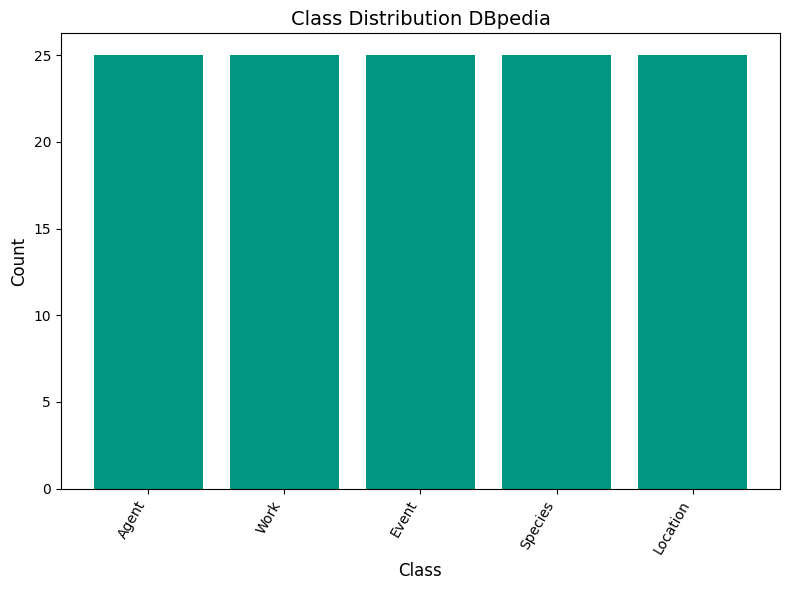

In [28]:
plot_type_distribution(transform_values(dict_dbpedia_types), "Class Distribution DBpedia")

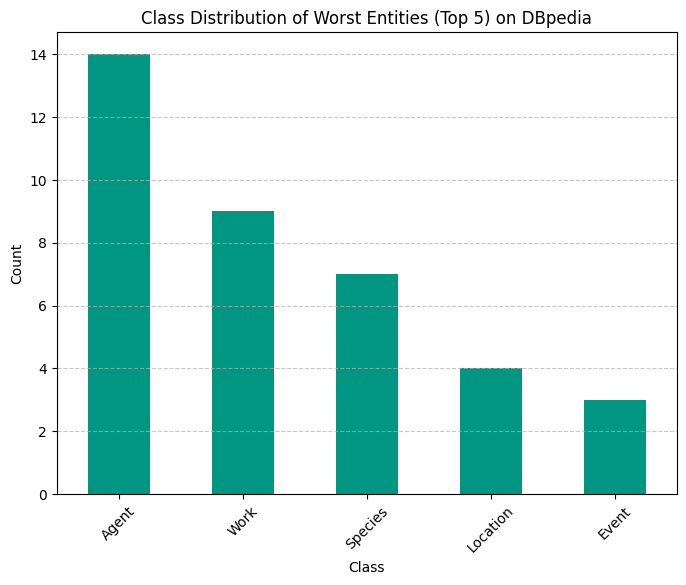

In [29]:
plot_type_distribution_worst_entities(df_worst_top5_dbpedia, dict_dbpedia_types, "Class Distribution of Worst Entities (Top 5) on DBpedia")

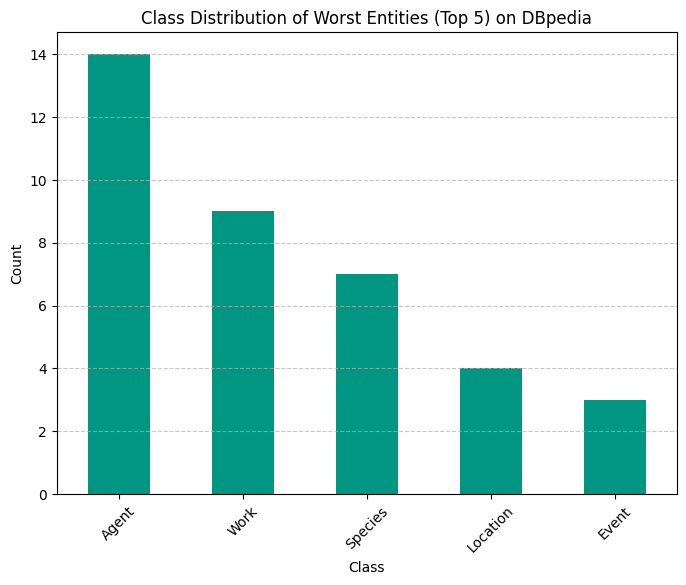

In [30]:
# Map IDs to classes using the dictionary
df_worst_top5_dbpedia["class"] = df_worst_top5_dbpedia["ID"].map(dict_dbpedia_types)

# Plot class distribution
class_counts = df_worst_top5_dbpedia["class"].value_counts()
plt.figure(figsize=(8, 6))
class_counts.plot(kind="bar", color=(0/255, 150/255, 130/255))
plt.title("Class Distribution of Worst Entities (Top 5) on DBpedia")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

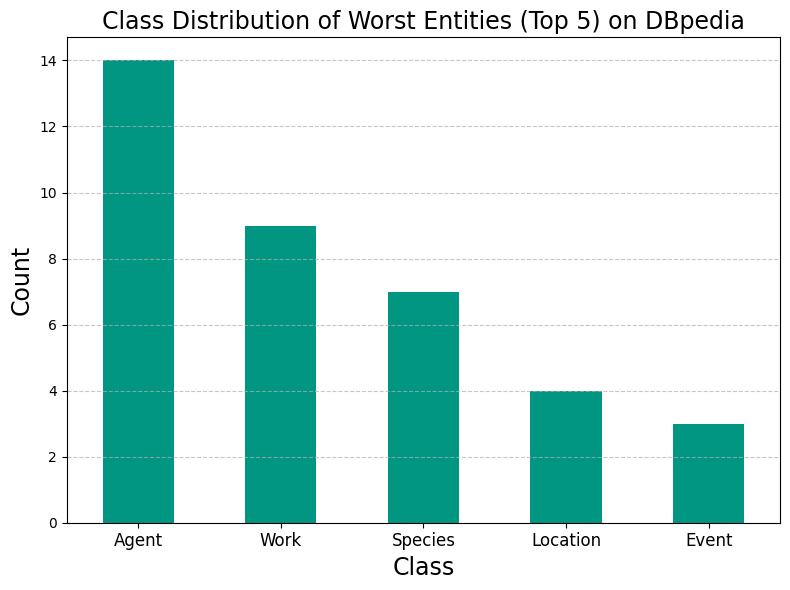

In [31]:

# Map IDs to classes using the dictionary
df_worst_top5_dbpedia["class"] = df_worst_top5_dbpedia["ID"].map(dict_dbpedia_types)

class_counts = df_worst_top5_dbpedia["class"].value_counts()
plt.figure(figsize=(8, 6))
ax = class_counts.plot(kind="bar", color=(0/255, 150/255, 130/255))
plt.title("Class Distribution of Worst Entities (Top 5) on DBpedia", fontsize=17) # Increased title font size

plt.xlabel("Class", fontsize=17)  # Increased x-axis label font size
plt.ylabel("Count", fontsize=17)  # Increased y-axis label font size

# Rotate x-axis labels for better readability and horizontal alignment
plt.xticks(rotation=0, ha='center', fontsize=12) # Horizontal, centered, increased font size

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve spacing around labels (optional)
plt.tight_layout() # Adjust layout to prevent labels from overlapping

plt.show()

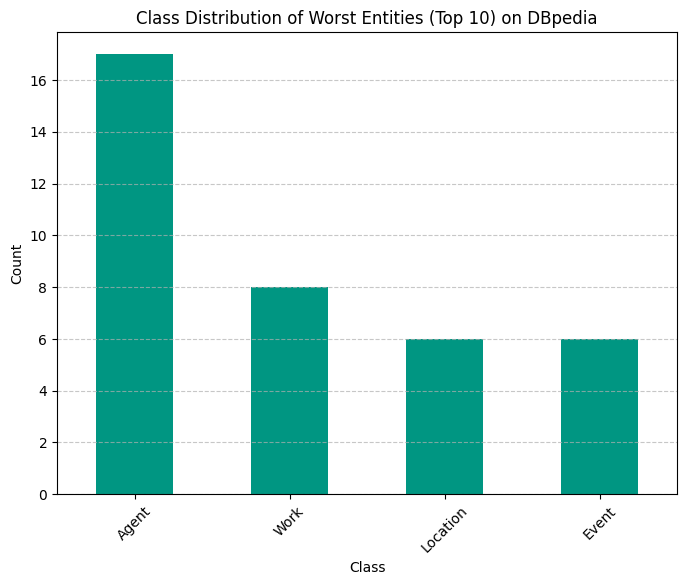

In [32]:
plot_type_distribution_worst_entities(df_worst_top10_dbpedia, dict_dbpedia_types, "Class Distribution of Worst Entities (Top 10) on DBpedia")

###### LinkedMDB

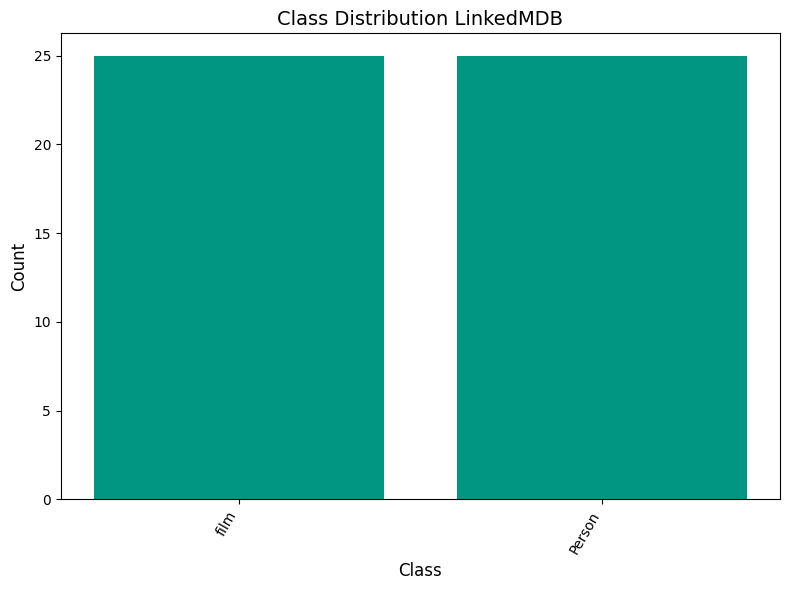

In [33]:
plot_type_distribution(dict_lmdb_types, "Class Distribution LinkedMDB")

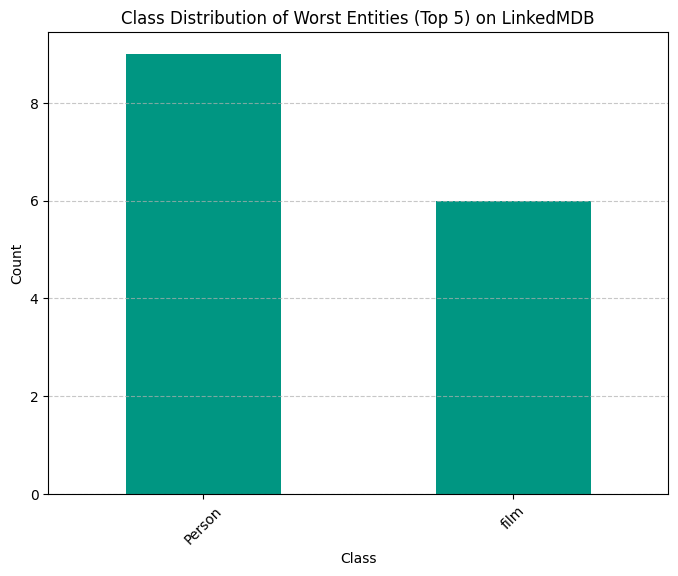

In [34]:
plot_type_distribution_worst_entities(df_worst_top5_lmdb, dict_lmdb_types, "Class Distribution of Worst Entities (Top 5) on LinkedMDB")

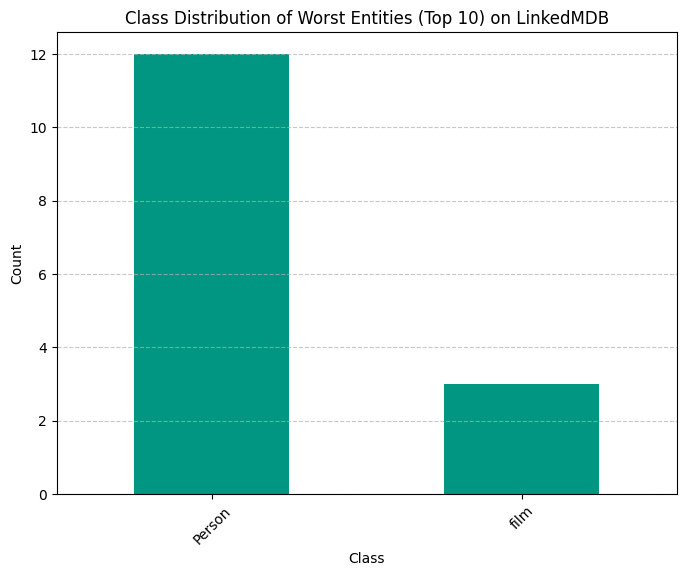

In [35]:
plot_type_distribution_worst_entities(df_worst_top10_lmdb, dict_lmdb_types, "Class Distribution of Worst Entities (Top 10) on LinkedMDB")

###### FACES

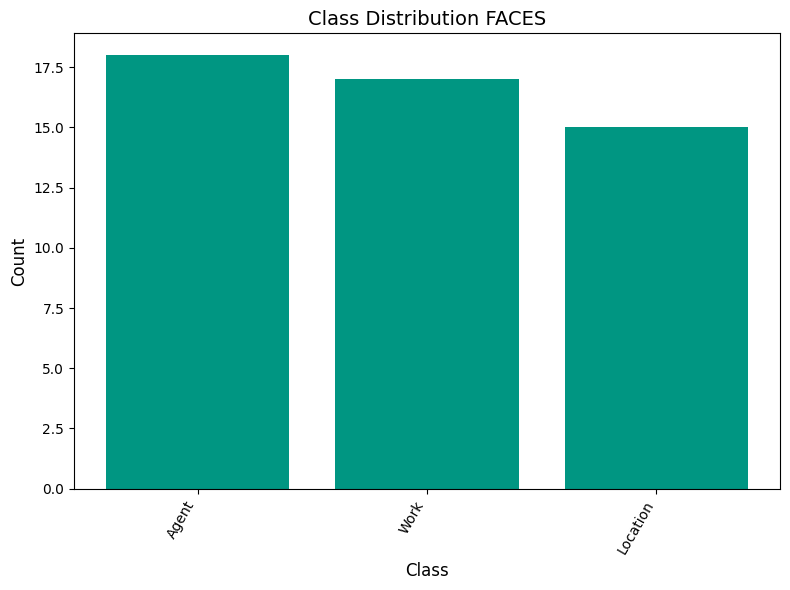

In [36]:
plot_type_distribution(transform_values(dict_faces_types), "Class Distribution FACES")

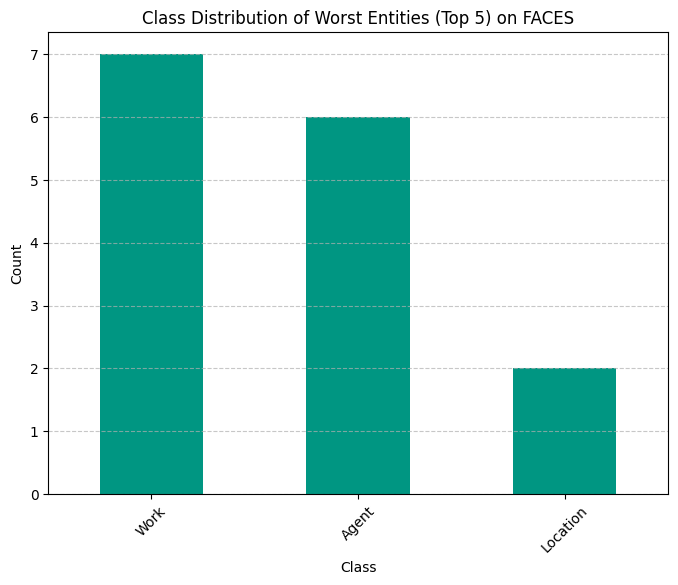

In [37]:
plot_type_distribution_worst_entities(df_worst_top5_faces, transform_values(dict_faces_types), "Class Distribution of Worst Entities (Top 5) on FACES")

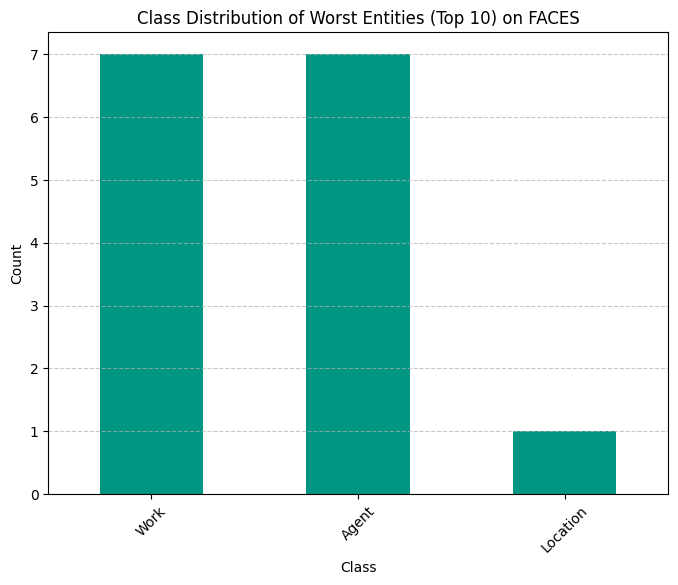

In [38]:
plot_type_distribution_worst_entities(df_worst_top10_faces, transform_values(dict_faces_types), "Class Distribution of Worst Entities (Top 10) on FACES")

Node Degree

###### DBpedia

In [39]:
# Calculate statistics for df_worst_top5_dbpedia_complete
mean_worst_top5 = df_worst_top5_dbpedia_complete["Node Degree"].mean()
median_worst_top5 = df_worst_top5_dbpedia_complete["Node Degree"].median()

# Calculate statistics for df_worst_top10_dbpedia_complete
mean_worst_top10 = df_worst_top10_dbpedia_complete["Node Degree"].mean()
median_worst_top10 = df_worst_top10_dbpedia_complete["Node Degree"].median()


# Calculate statistics for df_node_degree_dbpedia
mean_node_degree = df_node_degree_dbpedia["Node Degree"].mean()
median_node_degree = df_node_degree_dbpedia["Node Degree"].median()

# Print results
print("\ndf_node_degree_dbpedia - Node Degree")
print(f"Mean: {mean_node_degree}")
print(f"Median: {median_node_degree}")

print("df_worst_top5_dbpedia_complete - Node Degree")
print(f"Mean: {mean_worst_top5}")
print(f"Median: {median_worst_top5}")

print("df_worst_top10_dbpedia_complete - Node Degree")
print(f"Mean: {mean_worst_top10}")
print(f"Median: {median_worst_top10}")


df_node_degree_dbpedia - Node Degree
Mean: 35.488
Median: 31.0
df_worst_top5_dbpedia_complete - Node Degree
Mean: 44.729729729729726
Median: 39.0
df_worst_top10_dbpedia_complete - Node Degree
Mean: 51.91891891891892
Median: 50.0


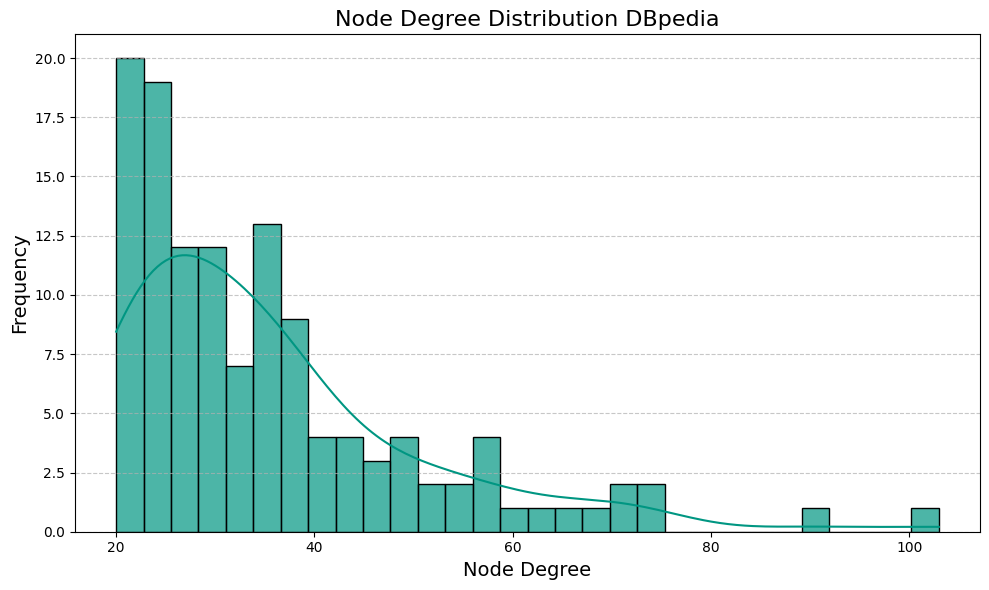

In [40]:
plot_node_degree_distribution(df_node_degree_dbpedia, "Node Degree Distribution DBpedia")

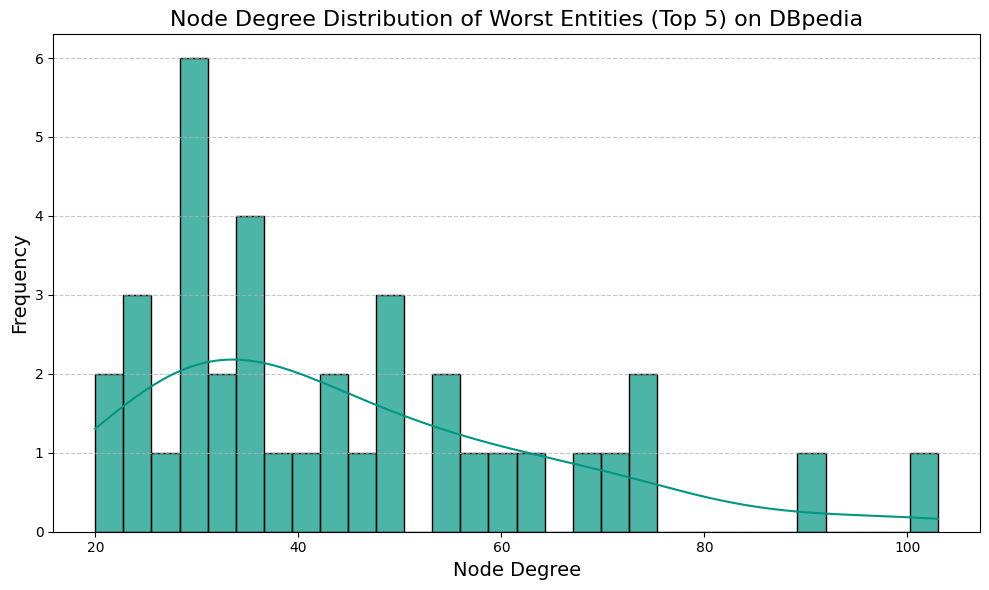

In [41]:
plot_node_degree_distribution(df_worst_top5_dbpedia_complete, "Node Degree Distribution of Worst Entities (Top 5) on DBpedia")

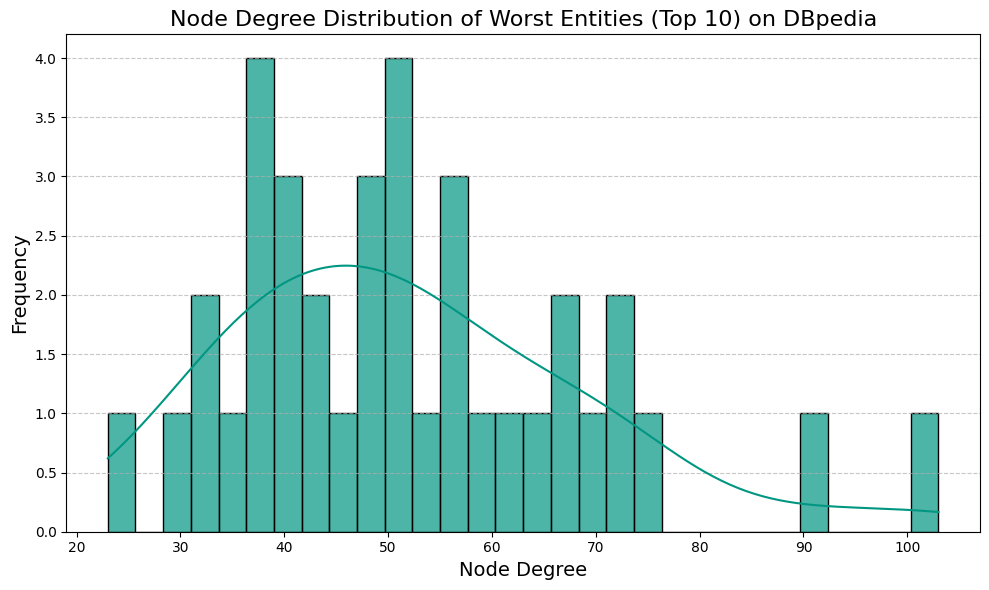

In [42]:
plot_node_degree_distribution(df_worst_top10_dbpedia_complete, "Node Degree Distribution of Worst Entities (Top 10) on DBpedia")

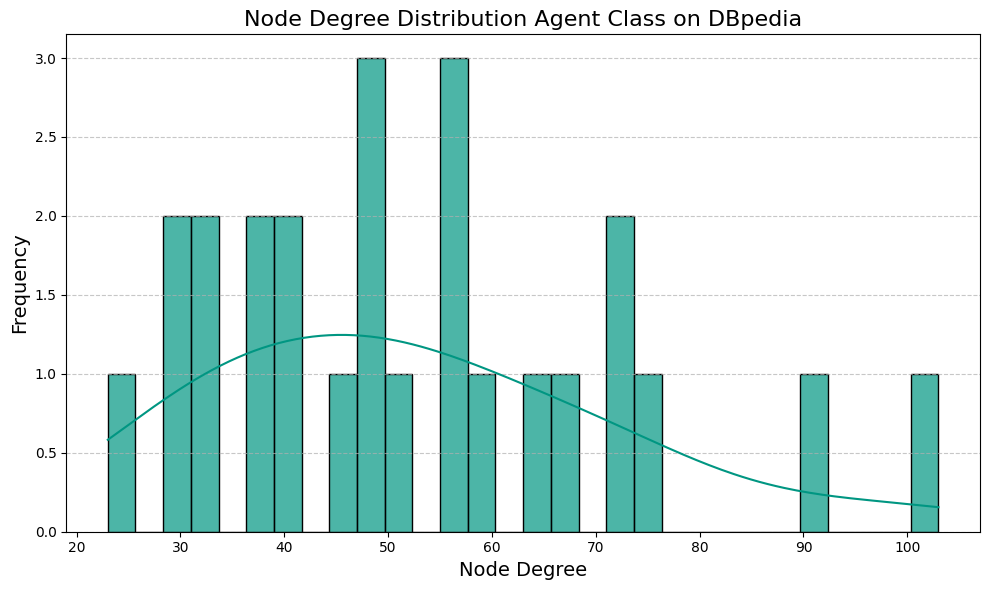

In [43]:
plot_node_degree_distribution(df_node_degree_dbpedia_agent, "Node Degree Distribution Agent Class on DBpedia")

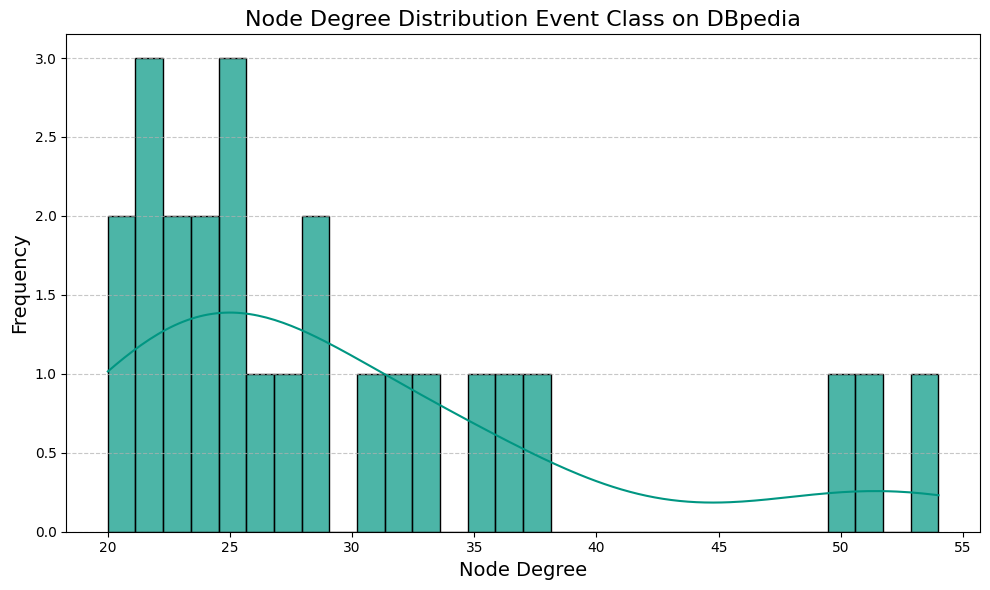

In [44]:
plot_node_degree_distribution(df_node_degree_dbpedia_event, "Node Degree Distribution Event Class on DBpedia")

In [45]:
print("Mean Node Degree - Agent Class",df_node_degree_dbpedia_agent["Node Degree"].mean())
print("Mean Node Degree - Work Class",df_node_degree_dbpedia_work["Node Degree"].mean())
print("Mean Node Degree - Species Class",df_node_degree_dbpedia_species["Node Degree"].mean())
print("Mean Node Degree - Location Class",df_node_degree_dbpedia_location["Node Degree"].mean())
print("Mean Node Degree - Event Class",df_node_degree_dbpedia_event["Node Degree"].mean())

Mean Node Degree - Agent Class 52.44
Mean Node Degree - Work Class 34.2
Mean Node Degree - Species Class 25.88
Mean Node Degree - Location Class 35.16
Mean Node Degree - Event Class 29.76


In [46]:
print("Median Node Degree - Agent Class",df_node_degree_dbpedia_agent["Node Degree"].median())
print("Median Node Degree - Work Class",df_node_degree_dbpedia_work["Node Degree"].median())
print("Median Node Degree - Species Class",df_node_degree_dbpedia_species["Node Degree"].median())
print("Median Node Degree - Location Class",df_node_degree_dbpedia_location["Node Degree"].median())
print("Median Node Degree - Event Class",df_node_degree_dbpedia_event["Node Degree"].median())

Median Node Degree - Agent Class 49.0
Median Node Degree - Work Class 33.0
Median Node Degree - Species Class 23.0
Median Node Degree - Location Class 34.0
Median Node Degree - Event Class 26.0


Further Analysis

In [47]:
# Find intersection of IDs
common_ids_dbpedia = set(df_worst_top5_dbpedia['ID']).intersection(set(df_worst_top10_dbpedia['ID']))
common_ids_lmdb = set(df_worst_top5_lmdb['ID']).intersection(set(df_worst_top10_lmdb['ID']))
common_ids_faces = set(df_worst_top5_faces['ID']).intersection(set(df_worst_top10_faces['ID']))

# Output the count
print(f"DBpedia: Number of worst entities for top 10 and top 5: {len(df_worst_top5_dbpedia)}")
print(f"DBpedia: Number of common entities: {len(common_ids_dbpedia)}")
print(f"LinkedMDB: Number of worst entities for top 10 and top 5: {len(df_worst_top5_lmdb)}")
print(f"LinkedMDB: Number of common entities: {len(common_ids_lmdb)}")
print(f"FACES: Number of worst entities for top 10 and top 5: {len(df_worst_top5_faces)}")
print(f"FACES: Number of common entities: {len(common_ids_faces)}")

DBpedia: Number of worst entities for top 10 and top 5: 37
DBpedia: Number of common entities: 20
LinkedMDB: Number of worst entities for top 10 and top 5: 15
LinkedMDB: Number of common entities: 8
FACES: Number of worst entities for top 10 and top 5: 15
FACES: Number of common entities: 7


In [ ]:
def plot_common_entities(df_top5, df_top10):
    """
    Plots a bar chart comparing entities between two DataFrames.

    Parameters:
    -----------
    df_top5 : pd.DataFrame
        A DataFrame containing the top 5 entities.
    df_top10 : pd.DataFrame
        A DataFrame containing the top 10 entities.

    Returns:
    --------
    None
        Displays a bar chart comparing unique and common entities.
    """

    unique_in_df1 = len(set(df_top5['ID']) - set(df_top10['ID']))
    unique_in_df2 = len(set(df_top10['ID']) - set(df_top5['ID']))
    common_entities = len(set(df_top5['ID']).intersection(set(df_top10['ID'])))

    # Create bar chart
    categories = ['Unique in Top 5', 'Unique in Top 10', 'Common in both']
    values = [unique_in_df1, unique_in_df2, common_entities]

    plt.figure(figsize=(8, 6))
    plt.bar(categories, values, color=['blue', 'green', 'orange'])
    plt.title('Entity Comparison')
    plt.ylabel('Number of Entities')
    plt.xlabel('Categories')
    plt.show()
    
    


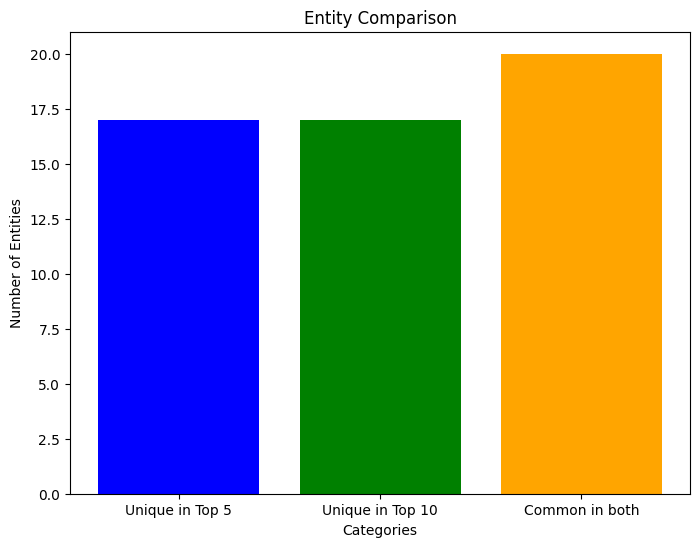

In [49]:
plot_common_entities(df_worst_top5_dbpedia, df_worst_top10_dbpedia)

In [50]:
def get_top_triples(directory: str):
    """
    Reads RDF files with a specific naming scheme from a directory,
    counts the occurrences of triples, and returns the top 10 triples by frequency.

    Args:
        directory (str): Path to the directory containing the RDF files.

    Returns:
        list: A list of tuples containing the top 10 triples and their counts.
    """
    triple_counter = Counter()

    # Iterate through files in the directory
    for filename in os.listdir(directory):
        if filename.startswith("56_gold_top5_") and filename.endswith(".nt"):
            file_path = os.path.join(directory, filename)
            
            # Read the file and count triples
            with open(file_path, 'r', encoding='utf-8') as file:
                for line in file:
                    triple = line.strip()
                    if triple:  # Avoid empty lines
                        triple_counter[triple] += 1

    # Get the top 10 triples
    top_triples = triple_counter.most_common(5)

    return top_triples, triple_counter

In [51]:
# Most common triples in gold solutions for entity 56 in DBpedia 
top_triples, triple_counter = get_top_triples("C:/Users/simon/Documents/Uni/UniMaterial/Master/Seminar Knowledge Graphs and LLM/ESLM-Experiment/datasets/ESBM_benchmark_v1.2/dbpedia_data/56")

In [52]:
print(top_triples)

[('<http://dbpedia.org/resource/Momchil_Tsvetanov> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/SoccerPlayer> .', 5), ('<http://dbpedia.org/resource/Momchil_Tsvetanov> <http://xmlns.com/foaf/0.1/name> "Momchil Emilov Tsvetanov"@en .', 3), ('<http://dbpedia.org/resource/Momchil_Tsvetanov> <http://dbpedia.org/ontology/position> <http://dbpedia.org/resource/Midfielder> .', 3), ('<http://dbpedia.org/resource/Momchil_Tsvetanov> <http://dbpedia.org/ontology/birthPlace> <http://dbpedia.org/resource/Pleven> .', 3), ('<http://dbpedia.org/resource/Momchil_Tsvetanov> <http://dbpedia.org/ontology/birthDate> "1990-03-12"^^<http://www.w3.org/2001/XMLSchema#date> .', 3)]
